# Day 1 Training Exercise
> Week 1: Python Programming for Data Analysis
- Numpy 
- Pandas 

In [2]:
import numpy as np
import pandas as pd
from pandas import Series

# Exercise: Weather forecast

1. Go to a Web site that shows the 10-day forecast for your area, Create a series containing the high temperatures for each day in the next 10 days.
2. Calculate each of the descriptive statistics.  Are there are any obvious outliers (very hot or very cold) in the coming 10 days?

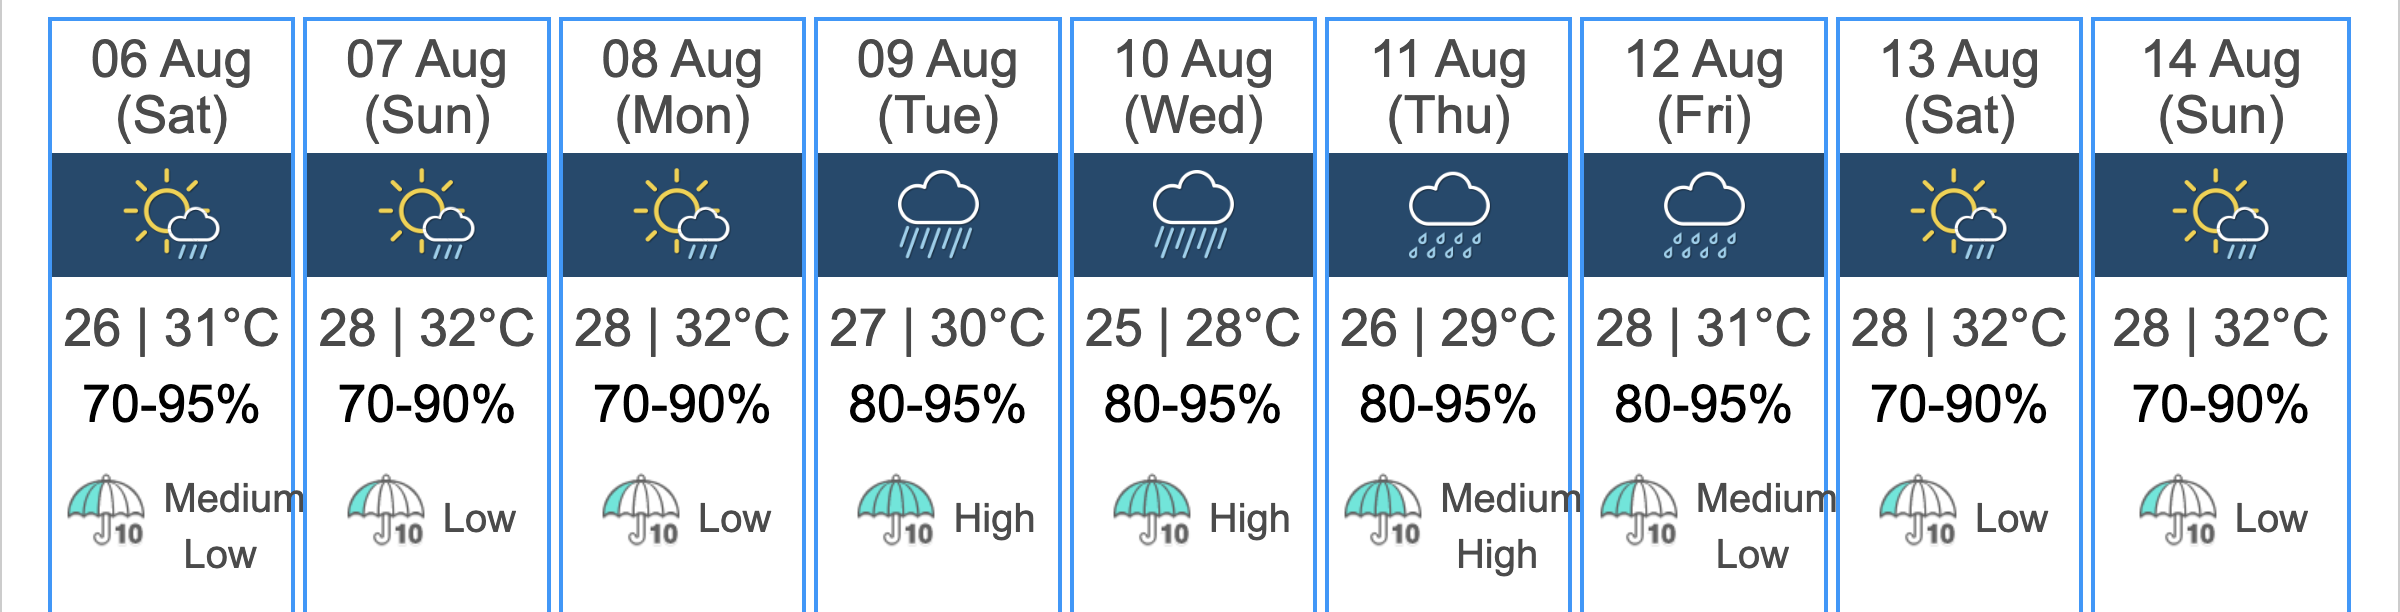

In [3]:
#Create pandas series s with index is the date, and temperature is the value
s = Series([31, 32, 32, 30, 28, 29, 31, 32, 32, 32])
s.index=(['0806', '0807', '0808', '0809', '0810','0811', '0812', '0813', '0814', '0815' ])

In [4]:
s

0806    31
0807    32
0808    32
0809    30
0810    28
0811    29
0812    31
0813    32
0814    32
0815    32
dtype: int64

In [7]:
# what will the weather be like on August 9th?
s.loc["0809"]

30

In [8]:
# what will the high temperature be on August 8th through 10th?
s.loc["0808":"0810"]

0808    32
0809    30
0810    28
dtype: int64

In [9]:
s.loc["0808":"0810"].max()

32

In [10]:
# or, if I prefer, just state them explicitly with a fancy index
s.loc[['0808', '0809', '0810']]

0808    32
0809    30
0810    28
dtype: int64

In [11]:
# Use s.describe() for getting the data characteristics
s.describe()

count    10.000000
mean     30.900000
std       1.449138
min      28.000000
25%      30.250000
50%      31.500000
75%      32.000000
max      32.000000
dtype: float64

In [12]:
s.loc[['0808', '0809', '0810']].describe()

count     3.0
mean     30.0
std       2.0
min      28.0
25%      29.0
50%      30.0
75%      31.0
max      32.0
dtype: float64

In [13]:
#Restrieve the postion via s.iloc
s.iloc[5]

29

### Exercise: Weather, with dates
- Recreate your weather series, using MMDD-style strings as your indexes.
- Retrieve, via the index, the high temperature on August 6th
- Retrieve, via the index, the high temperatures on August 7th through 10th.
- What is the max temp going to be from August 9th through 11th?

In [15]:
# method 1 for creating my series of temps with dates:
# create the series
# pass the keyword argument index with a list of strings

s = Series([31, 32, 32, 30, 28, 29, 31, 32, 32, 32],
          index=['0806', '0807', '0808', '0809', '0810','0811', '0812', '0813', '0814', '0815'])
s

0806    31
0807    32
0808    32
0809    30
0810    28
0811    29
0812    31
0813    32
0814    32
0815    32
dtype: int64

In [22]:
#Retrieve, via the index, the high temperature on August 6th
s.loc["0806"] 

31

In [21]:
#- Retrieve, via the index, the high temperatures on August 7th through 10th.
s.loc["0807":"0810"]

0807    32
0808    32
0809    30
0810    28
dtype: int64

In [20]:
#- What is the max temp going to be from August 9th through 11th?
s.loc["0809":"0811"].max()

30

# Exercise: Convert our temperatures¶
Assign s to be our 10-day forecast:

If your forecast is in Celsius, use broadcasting to get a new series in Fahrenheit
If your forecast is in Fahrenheit, use broadcasting to get a new series in Celsius

### °F = (°C × 9/5) + 32 
### C =  (°F − 32) x 5/9 

In [23]:
F_series = s*9/5 + 32

In [24]:
F_series

0806    87.8
0807    89.6
0808    89.6
0809    86.0
0810    82.4
0811    84.2
0812    87.8
0813    89.6
0814    89.6
0815    89.6
dtype: float64

In [25]:
C_series = (F_series - 32) * 5/9
C_series

0806    31.0
0807    32.0
0808    32.0
0809    30.0
0810    28.0
0811    29.0
0812    31.0
0813    32.0
0814    32.0
0815    32.0
dtype: float64

In [28]:
#Boolean with Series
k = Series([10,20,30,40,50])
k.loc[[True, False, True, True, False]]

0    10
2    30
3    40
dtype: int64

# Exercise: Family ages
Create a series in which the values are ages of people in your family, and the index contains their names.
Find all people who are below the mean age.
Find all people who are above the mean age + 1 std.
Find all people whose ages are odd.


In [29]:
s = Series([52, 50, 21, 19, 16],
          index=['RL', 'SF', 'AMLF', 'SBLF', 'ADLF'])

In [30]:
(s < s.mean())

RL      False
SF      False
AMLF     True
SBLF     True
ADLF     True
dtype: bool

In [32]:
#Find all people who are below the mean age.
s.loc[s<s.mean()]

AMLF    21
SBLF    19
ADLF    16
dtype: int64

In [33]:
#Find all people who are above the mean age + 1 std.
s.loc[s > (s.mean() + s.std())]

RL    52
SF    50
dtype: int64

In [36]:
#Find all people whose ages are odd.
s.loc[s%2 == 1]

AMLF    21
SBLF    19
dtype: int64

# Exercise: Very big and very small numbers¶
Generate a series with 100 random integers (as I've done, using np.random.randint) from 0-1000.
Find the numbers that are either very big (i.e., > mean + std) or very small (i.e., < mean - std)

In [37]:
s = Series(np.random.randint(1,1000,100))

In [38]:
s.head()

0    416
1     84
2    301
3    634
4    695
dtype: int64

In [39]:
s.describe()

count    100.000000
mean     483.700000
std      295.703732
min        3.000000
25%      241.250000
50%      478.000000
75%      718.500000
max      999.000000
dtype: float64

In [41]:
#Find the numbers that are either very big (i.e., > mean + std)
s.loc[s > (s.mean() + s.std())]

15    852
21    871
23    999
24    950
25    951
28    927
30    859
31    905
35    861
36    780
43    994
44    958
50    992
54    808
56    904
57    897
75    876
81    920
93    847
dtype: int64

In [44]:
#Boolean series for the above
s > s.mean() + s.std()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [43]:
#Find the numbers that are either very small (i.e., < mean - std)
s.loc[s < (s.mean() - s.std())]

1      84
6      93
7      79
9     136
10     45
17    122
20     28
26    166
27    101
32     44
41     73
47     31
52     99
55      3
70    174
72     10
78     19
84     88
87     31
88    185
91     65
dtype: int64

In [46]:
#Boolean series for the above
s < s.mean() - s.std()

0     False
1      True
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [47]:
# find numbers that are either very big or very small
s.loc[(s > s.mean() + s.std()) |
      (s < s.mean() - s.std())]

1      84
6      93
7      79
9     136
10     45
15    852
17    122
20     28
21    871
23    999
24    950
25    951
26    166
27    101
28    927
30    859
31    905
32     44
35    861
36    780
41     73
43    994
44    958
47     31
50    992
52     99
54    808
55      3
56    904
57    897
70    174
72     10
75    876
78     19
81    920
84     88
87     31
88    185
91     65
93    847
dtype: int64

# Exercise: Weekend temps
- Recreate our series of high temperatures, but instead of dates as the index, use day names (Mon, Tue).
-What will be the mean temperature on weekends (Sat-Sun).
-What will be the mean temperature on weekdays?

In [49]:
#Create pandas series s with index is the date, and temperature is the value
s = Series([31, 32, 32, 30, 28, 29, 31, 32, 32, 32])
s.index=(['SAT', 'SUN', 'MON', 'TUE', 'WED','THU', 'FRI', 'SAT', 'SUN', 'MON' ])

In [58]:
s.loc[["SAT","SUN"]].mean()

31.75

In [60]:
s.iloc[[0,1,7,8]].mean()

31.75

In [62]:
s.loc[s.index.isin(['SAT', 'SUN'])]

SAT    31
SUN    32
SAT    32
SUN    32
dtype: int64

# Exercise: Change in weather
- Using our high-temperature series, what are the 3 most common temperatures in your 10-day forecats?
- On what day will there be the greatest numeric (not percentage) change in temperature? 
- How about the smallest change?

In [70]:
s = Series([31, 32, 32, 30, 28, 29, 31, 32, 32, 32])
s.index=(['0806', '0807', '0808', '0809', '0810','0811', '0812', '0813', '0814', '0815' ])

In [71]:
s.value_counts()

32    5
31    2
30    1
28    1
29    1
dtype: int64

In [72]:
s.value_counts().head(2)

32    5
31    2
dtype: int64

In [74]:
s.diff()

0806    NaN
0807    1.0
0808    0.0
0809   -2.0
0810   -2.0
0811    1.0
0812    2.0
0813    1.0
0814    0.0
0815    0.0
dtype: float64

In [75]:
# find the day(s) with the greatest change in temp

s.loc[s.diff() == s.diff().max()]

0812    31
dtype: int64

In [76]:
# find the day(s) with the smallest change in temp

s.loc[s.diff() == s.diff().min()]

0809    30
0810    28
dtype: int64